This notebook is for a first eploratory data analysis of p2p voltage data with strains

In [1]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr

In [2]:
## Loading meshes that contain both strain data and p2p data

basePath="/home/csi20local/Dropbox/phd/Projects/Stanford/Data/DICOM_Gated_CT/S-0404"

la_msh_t4Path = f"{basePath}/MT/SW-0.0-BE-1e-9/cLr-fibres-aligned-4.vtp"
p2p_mshPath = f"{basePath}/UAC_CT_retry/clean-Labelled-refined-fibres-aligned-p2p.vtk"
p2p_mshPath = f"{basePath}/UAC_CT_retry/clean-Labelled-refined-fibres-aligned-p2p-ALL.vtk"

la_msh_t4 = pv.read(la_msh_t4Path)
p2p_msh = pv.read(p2p_mshPath)

In [3]:
p2p_msh_celld = p2p_msh.point_data_to_cell_data()

## With everything as Cell Data

(0.01983712965929485, 0.008252951484181549)


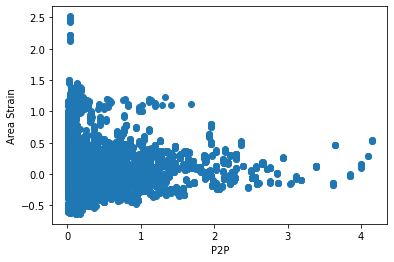

In [4]:
## Making naive scatter plot of cell by cell comparison of strain with p2p
## Will suffer from artefacts from the motion tracking

cell_condition = p2p_msh_celld.cell_data["p2p"] != 0.0

p2p_data = p2p_msh_celld.cell_data["p2p"][cell_condition]
strain_data = la_msh_t4.cell_data["area-strains"][cell_condition]

plt.scatter(p2p_data, strain_data)

plt.ylabel("Area Strain")
plt.xlabel("P2P")

print(pearsonr(p2p_data, strain_data))

(0.024454608752730287, 0.0011276341696937616)


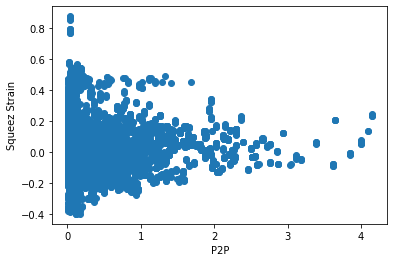

In [5]:
## Making naive scatter plot of cell by cell comparison of strain with p2p
## Will suffer from artefacts from the motion tracking

cell_condition = p2p_msh_celld.cell_data["p2p"] != 0.0

p2p_data = p2p_msh_celld.cell_data["p2p"][cell_condition]
strain_data = la_msh_t4.cell_data["squeez_minus"][cell_condition]

plt.scatter(p2p_data, strain_data)

plt.ylabel("Squeez Strain")
plt.xlabel("P2P")

print(pearsonr(p2p_data, strain_data))

(0.09345986681671968, 1.0701619511850439e-35)


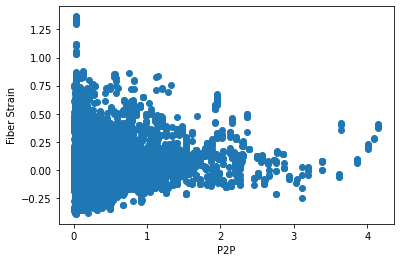

In [6]:
## Making naive scatter plot of cell by cell comparison of strain with p2p
## Will suffer from artefacts from the motion tracking

cell_condition = p2p_msh_celld.cell_data["p2p"] != 0.0

p2p_data = p2p_msh_celld.cell_data["p2p"][cell_condition]
strain_data = la_msh_t4.cell_data["endo_avg-f1_strains"][cell_condition]

plt.scatter(p2p_data, strain_data)

plt.ylabel("Fiber Strain")
plt.xlabel("P2P")

print(pearsonr(p2p_data, strain_data))

## With everything as Point Data (preferred)

Doesn't alter p2p measurements

In [7]:
la_msh_t4_pointd = la_msh_t4.cell_data_to_point_data()

(0.014933831032408463, 0.40677633692534043)


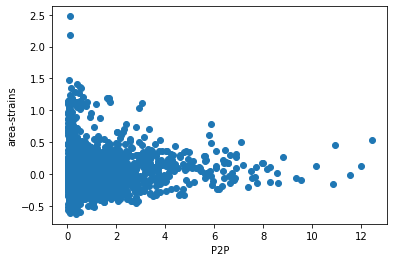

In [8]:
## Making naive scatter plot of cell by cell comparison of strain with p2p
## Will suffer from artefacts from the motion tracking

strain_type="area-strains"

point_condition = p2p_msh.point_data["p2p"] != 0.0

p2p_data = p2p_msh.point_data["p2p"][point_condition]
strain_data = la_msh_t4_pointd.point_data[strain_type][point_condition]

plt.scatter(p2p_data, strain_data)

plt.ylabel(strain_type)
plt.xlabel("P2P")

print(pearsonr(p2p_data, strain_data))

(0.01904281225606147, 0.2901136681287273)


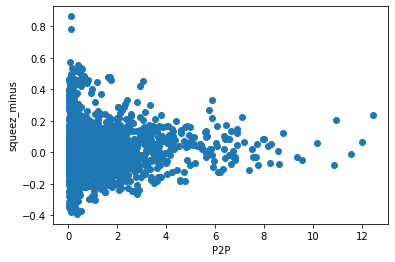

In [9]:
## Making naive scatter plot of cell by cell comparison of strain with p2p
## Will suffer from artefacts from the motion tracking

strain_type="squeez_minus"

point_condition = p2p_msh.point_data["p2p"] != 0.0

p2p_data = p2p_msh.point_data["p2p"][point_condition]
strain_data = la_msh_t4_pointd.point_data[strain_type][point_condition]

plt.scatter(p2p_data, strain_data)

plt.ylabel(strain_type)
plt.xlabel("P2P")

print(pearsonr(p2p_data, strain_data))

(0.08818010332257659, 9.213800909576352e-07)


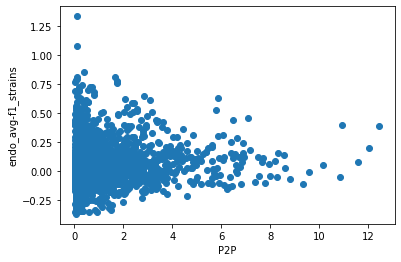

In [10]:
## Making naive scatter plot of cell by cell comparison of strain with p2p
## Will suffer from artefacts from the motion tracking

strain_type="endo_avg-f1_strains"

point_condition = p2p_msh.point_data["p2p"] != 0.0

p2p_data = p2p_msh.point_data["p2p"][point_condition]
strain_data = la_msh_t4_pointd.point_data[strain_type][point_condition]

plt.scatter(p2p_data, strain_data)

plt.ylabel(strain_type)
plt.xlabel("P2P")

print(pearsonr(p2p_data, strain_data))

# Taking Means in Regions

In [12]:
uac_reg_msh = pv.read(f"{basePath}/UAC_CT_retry/LCoords_2D_R_v3_C-regional_labels.vtk")

uac_reg_msh = uac_reg_msh.cell_data_to_point_data()

In [21]:
## True for points without p2p value
point_condition = uac_reg_msh.point_data["p2p"] == 0.0
point_condition

pyvista_ndarray([ True,  True,  True, ...,  True,  True,  True])

In [44]:
## Regional filter
region_condition = uac_reg_msh.point_data["region_label_v2"] == 5.0
region_condition

pyvista_ndarray([ True,  True,  True, ..., False, False, False])

In [23]:
## Set points without p2p value to nan
uac_reg_msh.point_data["p2p"][point_condition] = np.nan

In [24]:
## Checking nan set
uac_reg_msh.point_data["p2p"][point_condition]

pyvista_ndarray([nan, nan, nan, ..., nan, nan, nan])

In [45]:
uac_reg_msh.point_data["p2p"][region_condition]

pyvista_ndarray([nan, nan, nan, ..., nan, nan, nan])

In [46]:
np.nanmean(uac_reg_msh.point_data["p2p"][region_condition])

pyvista_ndarray(1.5001472)

In [48]:
## Number of points without p2p value
np.sum(point_condition)

pyvista_ndarray(182197)

In [49]:
p2p_reg_mean = np.zeros((5,))

for i in range(0, 5):
    region_i = i+1.
    
    ## For points where there exists no p2p value, set to nan
    point_condition = uac_reg_msh.point_data["p2p"] == 0.0
    uac_reg_msh.point_data["p2p"][point_condition] = np.nan
    
    ## Regional filter
    region_condition = uac_reg_msh.point_data["region_label_v2"] == region_i
    p2p_data = uac_reg_msh.point_data["p2p"][region_condition]
    
    p2p_reg_mean[i] = np.nanmean(p2p_data)    


In [50]:
p2p_reg_mean

array([1.68711588, 0.32491483, 0.69990979, 0.56365871, 1.5001472 ])

In [51]:
la_msh_t4.cell_data

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : endo_avg-f3_strains
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    epi_avg                 float64  (369472, 3)
    elemTag                 int32    (369472,)
    endo_avg                float64  (369472, 3)
    area-strains            float64  (369472,)
    squeez                  float64  (369472,)
    squeez_minus            float64  (369472,)
    epi_avg-f1_strains      float64  (369472,)
    epi_avg-f2_strains      float64  (369472,)
    epi_avg-f3_strains      float64  (369472,)
    endo_avg-f1_strains     float64  (369472,)
    endo_avg-f2_strains     float64  (369472,)
    endo_avg-f3_strains     float64  (369472,)            SCALARS

In [61]:
## strain means
strain_type="squeez_minus"

uac_reg_msh = pv.read(f"{basePath}/UAC_CT_retry/LCoords_2D_R_v3_C-regional_labels.vtk")

strain_mean = np.zeros((5,))

for i in range(0, 5):
    region_i = i+1.
    
    ## Regional filter
    region_condition = uac_reg_msh.cell_data["region_label_v2"] == region_i
    strain_data = la_msh_t4.cell_data[strain_type][region_condition]
    
    strain_mean[i] = np.nanmean(strain_data)

In [62]:
strain_mean

array([ 0.01289843,  0.04657261,  0.04587294, -0.01995555,  0.01116443])

(-0.26455859105317936, 0.6671252451340907)

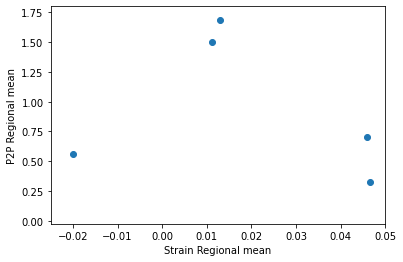

In [67]:
plt.scatter(strain_mean, p2p_reg_mean)

plt.ylabel("P2P Regional mean")
plt.xlabel("Strain Regional mean")
plt.xlim(-0.025, 0.05)
plt.ylim(-0.025, 1.8)

pearsonr(strain_mean, p2p_reg_mean)